## Introduction to Seaborn : statistical data visualisation

Seaborn is a **Python data visualization library** based on **matplotlib**.
It provides a high-level interface for drawing attractive and informative statistical graphics.

### Downloading seaborn

If you are using pip installer for Python libraries, you can execute the following command to download the library:

> * pip install seaborn

Alternatively, if you are using the Anaconda distribution of Python, you can use execute the following command to download the seaborn library:

> * conda install seaborn

### Requirement:
- Seaborn library
- Sklearn
- Pandas
- Matplotlib

### Content 
- Distributional plots
- Joint plots
- Pair plots
- Bar plots
- Count plots
- Box plots

### Import libraries

In [2]:
"""import all the neccessary libraries"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [3]:
""" Load the titanic dataset of using seaborn library and display top 5 rows of dataset"""

data = sns.load_dataset("titanic") 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Distributional Plots
Distributional plots, as the name suggests are type of plots that show the statistical distribution of data. 

Show the histogram distribution of data for a single column.
- The column name is passed as a parameter to the function whose distribution we are trying to plot.

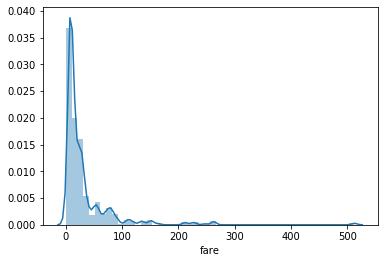

In [4]:
""" distributional plot of fare column of the data"""

sns.distplot(data['fare'])

You can see that most of the tickets have been solved between 0-50 dollars. 

The line that you see represents the **kernel density estimation**. You can remove this line by passing False as the parameter for the **kde attribute** below:

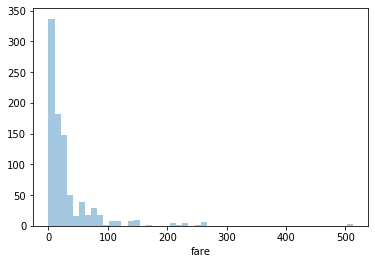

In [5]:
""" distributional plot of fare column of the data without kernel density estimation"""

sns.distplot(data['fare'], kde=False)

You can also pass the value for the **bins parameter** in order to see more or less details in the graph.
**Bin** is number of division on horizontal axis.

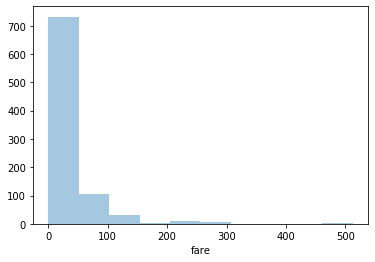

In [6]:
""" distributional plot of fare column of the data without kernel density estimation and bin of 10
    to see things more in detail """

sns.distplot(data['fare'], kde=False, bins=10)

You can clearly see that for more than 700 passengers, the ticket price is between 0 and 50.

### The Joint Plot

The jointplot() is used to display the mutual distribution of each column.

You need to pass three parameters to jointplot:
- the column name for which you want to display the distribution of data on x-axis.
- the column name for which you want to display the distribution of data on y-axis.
- the name of the data frame

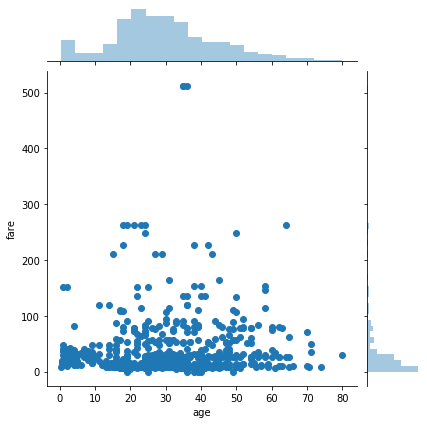

In [7]:
""" plot a joint plot of age and fare columns to see if we can find any relationship between the two."""

sns.jointplot(x='age', y='fare', data=data)

Three component of the graph:
- A distribution plot at the top for the column on the x-axis,
- a distribution plot on the right for the column on the y-axis
- a scatter plot in between that shows the mutual distribution of data for both the columns.

You can see that there is no correlation observed between prices and the fares.

You can change the type of the joint plot by passing a value for the **kind parameter**.
For instance, if instead of scatter plot, you want to display the distribution of data in the form of a hexagonal plot, you can pass the value **hex**  for the **kind parameter**.

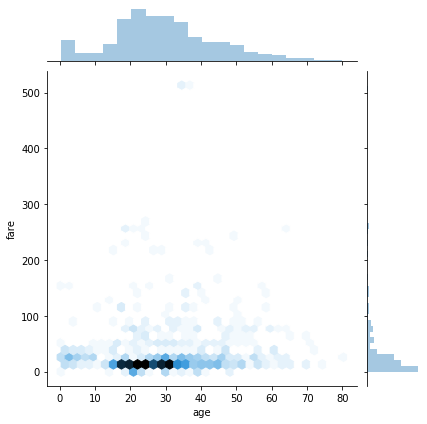

In [8]:
""" plot a joint plot of age and fare columns to see if we can find any relationship between 
    the two, with kind parameters as hex """

sns.jointplot(x='age', y='fare', data=data, kind='hex')

In the hexagonal plot, the hexagon with most number of points gets darker color. So if you look at the above plot, you can see that most of the passengers are between age 15 and 33 and most of them paid between 10-50 for the tickets.

### The Pair Plot
The paitplot() is a type of distribution plot that basically plots a **joint plot** for all the possible combination of numeric and Boolean columns in your dataset.

- You only need to pass the name of your dataset as the parameter to the pairplot() function.

In [9]:
""" before executing pairplot remove all the null value"""

data = data.dropna()

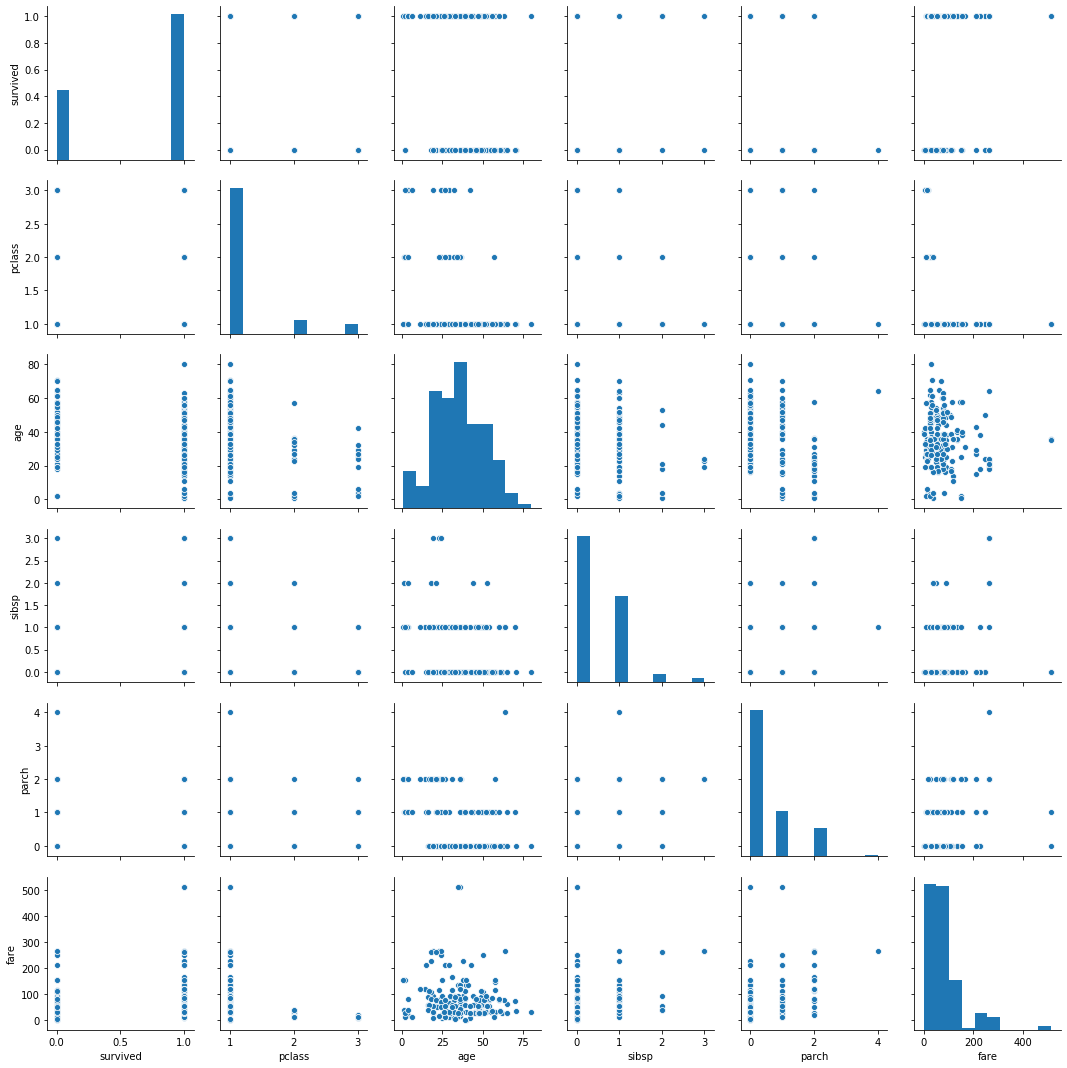

In [10]:
""" write the code for pairplot of multiple data columns"""
data1=data[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked', 'class']]
sns.pairplot(data1)

## Categorical Plots
Categorical plots, as the name suggests are normally used to plot categorical data. The categorical plots plot the values in the categorical column against another categorical column or a numeric column. Let's see some of the most commonly used categorical data.

### The Bar Plot
The barplot() is used to display the mean value for each value in a categorical column, against a numeric column. 
- The first parameter is the categorical column
- the second parameter is the numeric column 
- the third parameter is the dataset. 

For instance, if you want to know the mean value of the age of the male and female passengers, you can use the bar plot as follows.

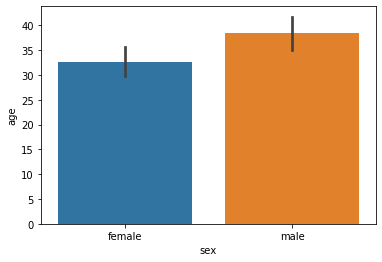

In [11]:
"""plot the bar graph of sex and age , if you want to know the mean value of the age of the male and female passengers"""
sns.barplot(x='sex', y='age', data=data)

From the output, you can clearly see that the average age of male passengers is just less than 40 while the average age of female passengers is around 33.

In addition to finding the average, the bar plot can also be used to calculate other aggregate values for each category. To do so, you need to pass the aggregate function to the estimator. For instance, you can calculate the standard deviation for the age of each gender.

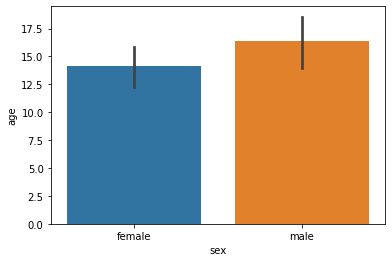

In [12]:
sns.barplot(x='sex', y='age', data=data, estimator=np.std)

we use the std aggregate function from the numpy library to calculate the standard deviation for the ages of male and female passengers.

### The Count Plot
The count plot is similar to the bar plot, however it displays the count of the categories in a specific column. For instance, if we want to count the number of males and women passenger.

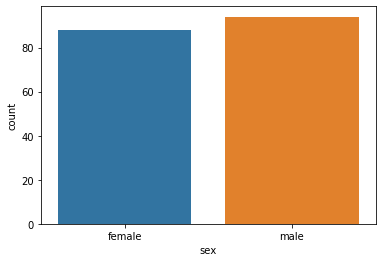

In [13]:
"""plot the count plot to check the no of females and males in the ship"""

sns.countplot(x='sex', data=data)

### The Box Plot
The box plot is used to display the distribution of the categorical data in the form of quartiles. 
The center of the box shows the median value.
The value from the lower whisker to the bottom of the box shows the first quartile.
From the bottom of the box to the middle of the box lies the second quartile.
From the middle of the box to the top of the box lies the third quartile and
finally from the top of the box to the top whisker lies the last quartile.

- The first parameter is the categorical column
- the second parameter is the numeric column 
- the third parameter is the dataset.

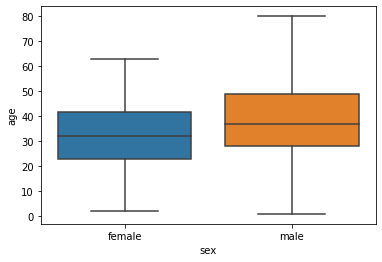

In [15]:
"""plot a box plot that displays the distribution for the age with respect to each gender. """

sns.boxplot(x='sex', y='age', data=data)

The box plot for female.
- The first quartile starts at around 5 and ends at 22 which means that 25% of the passengers are aged between 5 and 25. 
- The second quartile starts at around 23 and ends at around 32 which means that 25% of the passengers are aged between 23 and 32. 
- The third quartile starts and ends between 34 and 42, hence 25% passengers are aged within this range 
- finally the fourth or last quartile starts at 43 and ends around 65.

If there are any outliers or the passengers that do not belong to any of the quartiles, they are called **outliers** and are represented by **dots on the box plot**.

If you want to see the box plots of forage of passengers of both genders, along with the information about whether or not they survived, you can pass the survived as value to the hue parameter

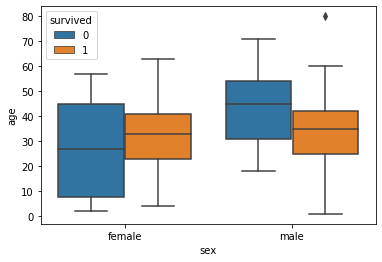

In [17]:
"""plot a box plot that displays the distribution for the age with respect to each gender with jue as survived"""

sns.boxplot(x='sex', y='age', data=data, hue="survived")

Now in addition to the information about the age of each gender, you can also see the distribution of the passengers who survived.
For instance, you can see that among the male passengers, on average more younger people survived as compared to the older ones. Similarly, you can see that the variation among the age of female passengers who did not survive is much greater than the age of the surviving female passengers.

### Further readings:
- https://seaborn.pydata.org/tutorial.html